In [1]:
from TELF.post_processing.Wolf import Graph

/Users/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Create Sample Graph

### Default Constructor

In [2]:
g = Graph()

### Create Graph with a Global Attribute

In [3]:
g = Graph(foo='bar')

In [4]:
g.foo

'bar'

### Try Creating Graph with an Invalid Global Attribute

In [5]:
try:
    g = Graph(nodes='bar')
except ValueError as e:
    print(e)

'nodes' is reserved by the Graph class and cannot be used as an attribute name.


### Add some Nodes

In [6]:
g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)

#### Add some nodes with custom attributes

In [7]:
g.add_node(5, foo='label_A')
g.add_node(6, bar='label_B')

#### Try to add a duplicate node

In [8]:
try:
    g.add_node(0)
except ValueError as e:
    print(e)

Node "0" already exists!


### Add some Edges

In [9]:
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(1, 4)
g.add_edge(2, 1)
g.add_edge(2, 3)
g.add_edge(4, 2)
g.add_edge(4, 3)
g.add_edge(5, 6)

#### Try to add a duplicate edge

In [10]:
try:
    g.add_edge(0, 1)
except ValueError as e:
    print(e)

Edge from node "0" to node "1" already exists!


#### Try to add a loop

In [11]:
try:
    g.add_edge(0, 0)
except ValueError as e:
    print(e)

### Visualize the Graph

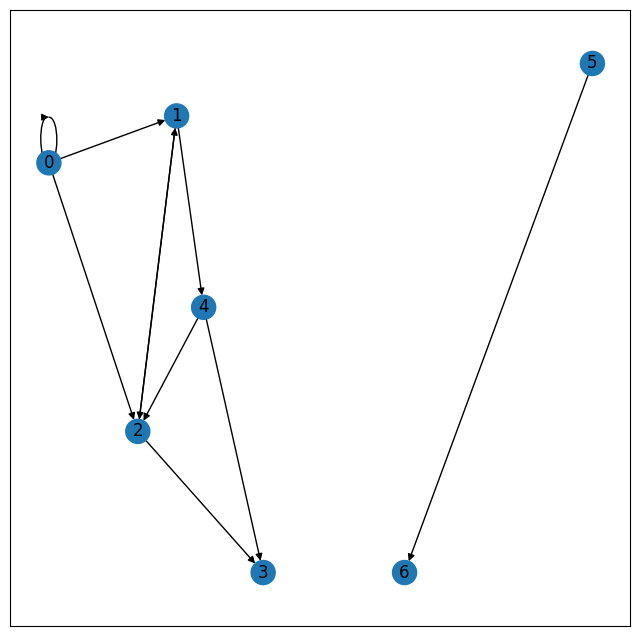

In [12]:
g.visualize()

## 2. Create Copy of the Graph

### Subgraph

In [13]:
g2 = g.subgraph([0,1,2,3,4])  # specifying which nodes to keep
assert g.uid != g2.uid, 'No copy has been created'

#### Make sure global attributes are preserved

In [14]:
g2.foo  

'bar'

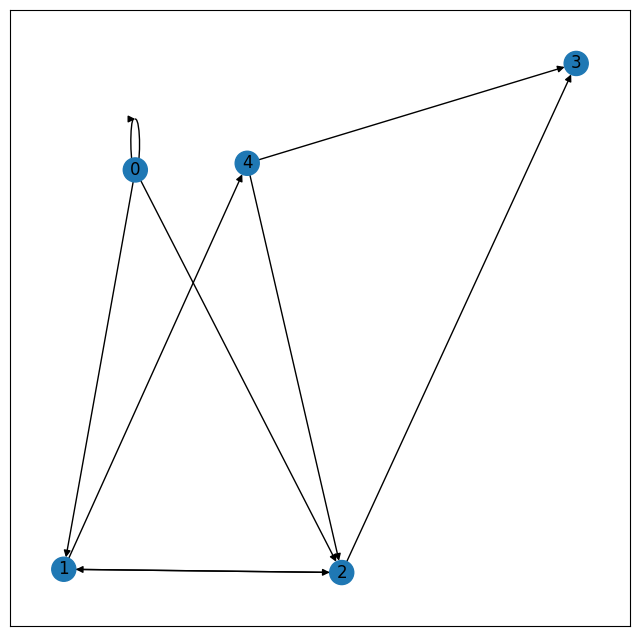

In [15]:
g2.visualize()

## 3. Compute Stats using Direct Call

### degree

In [16]:
g.get_degree()

{'degree': {'0': 4, '1': 4, '2': 5, '3': 2, '4': 3, '5': 1, '6': 1},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### in_degree

In [17]:
g.get_in_degree()

{'in_degree': {'0': 1, '1': 2, '2': 3, '3': 2, '4': 1, '5': 0, '6': 1},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### out_degree

In [18]:
g.get_out_degree()

{'out_degree': {'0': 3, '1': 2, '2': 2, '3': 0, '4': 2, '5': 1, '6': 0},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### page_rank

In [19]:
g.get_page_rank()

{'page_rank': {'0': 0.0846965396536839,
  '1': 0.17728840207373622,
  '2': 0.2178642867413023,
  '3': 0.211110698461236,
  '4': 0.1360472936917415,
  '5': 0.060699191322653404,
  '6': 0.11229358805564651},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### in_closeness

In [20]:
g.get_in_closeness()

{'in_closeness': {'0': 0.0,
  '1': 0.375,
  '2': 0.5,
  '3': 0.4444444444444444,
  '4': 0.3,
  '5': 0.0,
  '6': 0.16666666666666666},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### out_closeness

In [21]:
g.get_out_closeness()

{'out_closeness': {'0': 0.4444444444444444,
  '1': 0.375,
  '2': 0.375,
  '3': 0.0,
  '4': 0.375,
  '5': 0.16666666666666666,
  '6': 0.0},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### hubs_authorities

In [22]:
g.get_hubs_authorities()

{'hubs': {'0': 0.3406653218024886,
  '1': 0.2026164949162295,
  '2': 0.2026164949162294,
  '3': -0.0,
  '4': 0.2541016883650524,
  '5': -1.2807675975157523e-17,
  '6': -0.0},
 'authorities': {'0': 0.1455420895201501,
  '1': 0.23210572295758622,
  '2': 0.34066532180248876,
  '3': 0.1951232322823387,
  '4': 0.08656363343743631,
  '5': 2.7005748116313645e-17,
  '6': -2.7005748116313645e-17},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

### betweenness_centrality

In [23]:
g.get_betweenness_centrality()

{'betweenness_centrality': {'0': 0.0,
  '1': 0.06666666666666667,
  '2': 0.08333333333333333,
  '3': 0.0,
  '4': 0.016666666666666666,
  '5': 0.0,
  '6': 0.0},
 'uid': 'e9a04063-53d0-42f9-b482-079a04baf3f9'}

## 4. Compute Stats using Wrapper

In [24]:
g.stat_funcs

['degree',
 'in_degree',
 'in_weight',
 'page_rank',
 'out_degree',
 'out_weight',
 'in_closeness',
 'out_closeness',
 'hubs_authorities',
 'betweenness_centrality']

In [25]:
for stat in g.stat_funcs:
    g.get_stat(stat)

#### Try an invalid stat

In [26]:
try:
    g.get_stat('foo')
except ValueError as e:
    print(e)

"foo" is not a valid Graph stat
Options are: ['degree', 'in_degree', 'in_weight', 'page_rank', 'out_degree', 'out_weight', 'in_closeness', 'out_closeness', 'hubs_authorities', 'betweenness_centrality']


#### Look at stats

In [27]:
g.stats

{'in_degree': {'0': 1, '1': 2, '2': 3, '3': 2, '4': 1, '5': 0, '6': 1},
 'out_degree': {'0': 3, '1': 2, '2': 2, '3': 0, '4': 2, '5': 1, '6': 0},
 'degree': {'0': 4, '1': 4, '2': 5, '3': 2, '4': 3, '5': 1, '6': 1},
 'page_rank': {'0': 0.0846965396536839,
  '1': 0.17728840207373622,
  '2': 0.2178642867413023,
  '3': 0.211110698461236,
  '4': 0.1360472936917415,
  '5': 0.060699191322653404,
  '6': 0.11229358805564651},
 'in_closeness': {'0': 0.0,
  '1': 0.375,
  '2': 0.5,
  '3': 0.4444444444444444,
  '4': 0.3,
  '5': 0.0,
  '6': 0.16666666666666666},
 'out_closeness': {'0': 0.4444444444444444,
  '1': 0.375,
  '2': 0.375,
  '3': 0.0,
  '4': 0.375,
  '5': 0.16666666666666666,
  '6': 0.0},
 'hubs': {'0': 0.3406653218024886,
  '1': 0.20261649491622943,
  '2': 0.2026164949162295,
  '3': -0.0,
  '4': 0.2541016883650524,
  '5': 4.002398742236726e-19,
  '6': -0.0},
 'authorities': {'0': 0.1455420895201501,
  '1': 0.23210572295758633,
  '2': 0.3406653218024887,
  '3': 0.19512323228233877,
  '4': 0

## 5. Weakly Connected Components

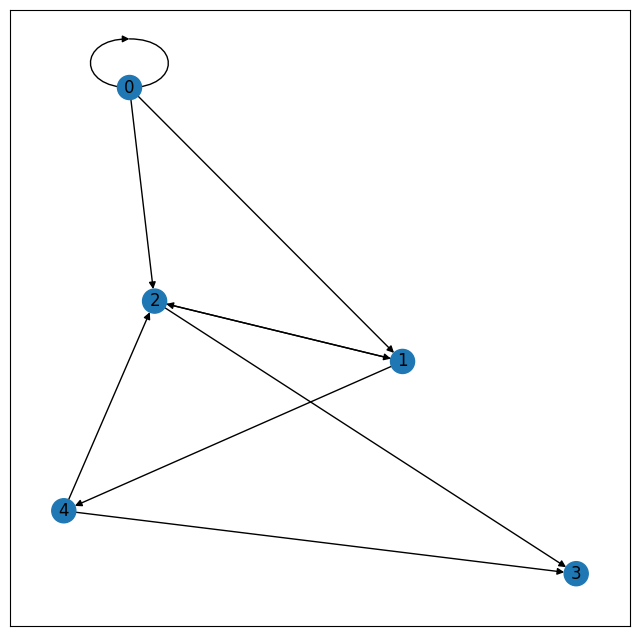

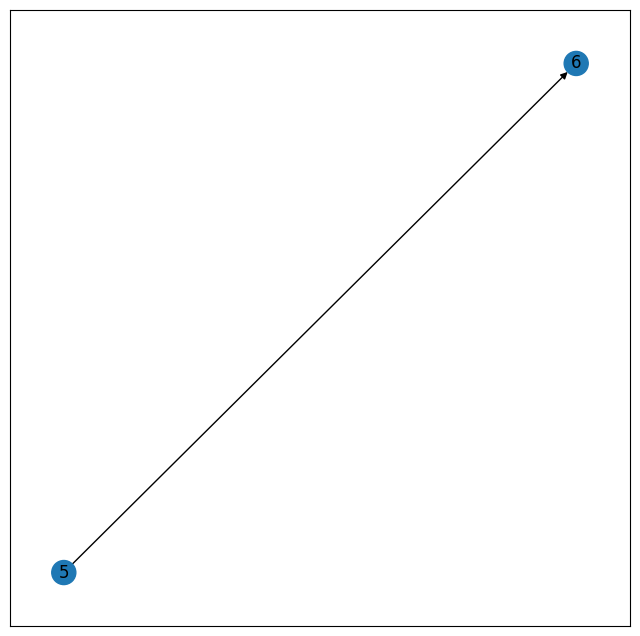

In [28]:
wcc = g.weakly_connected_components()
for c in wcc:
    c.visualize()

## 6. Strongly Connected Components

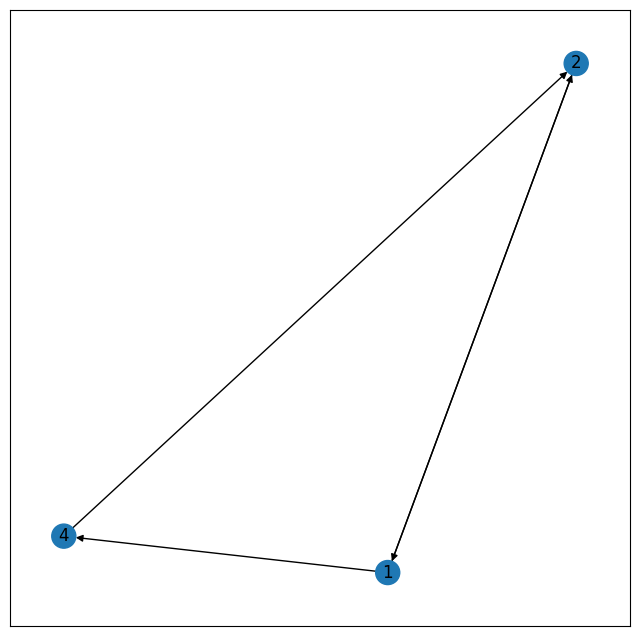

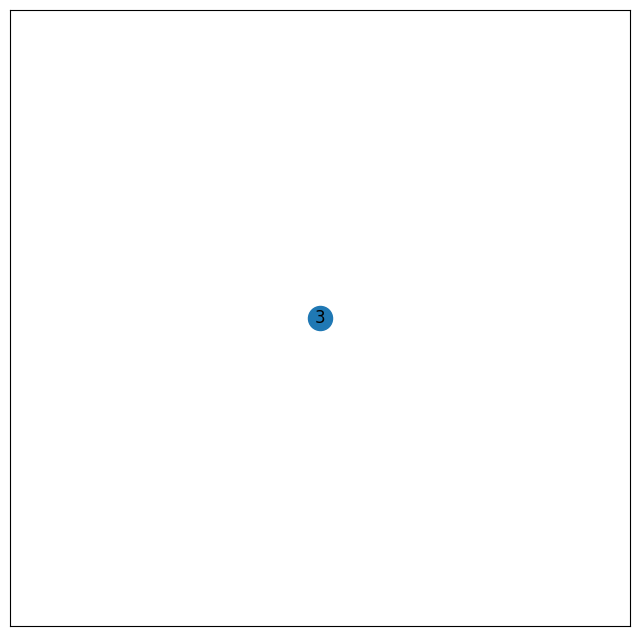

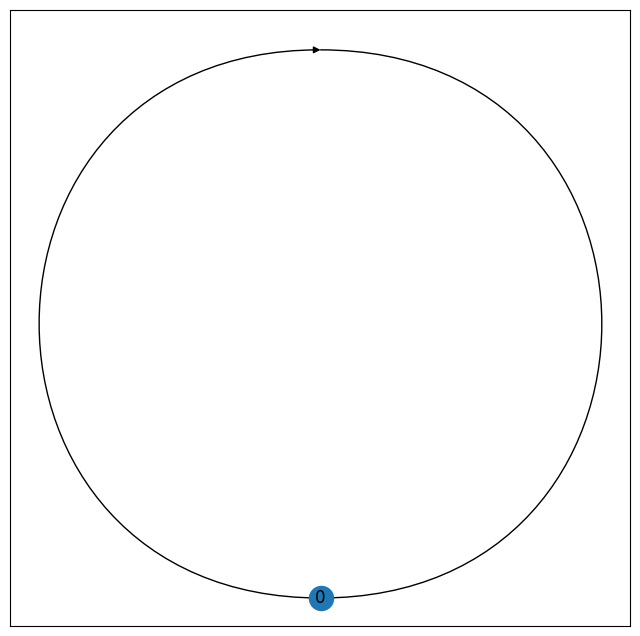

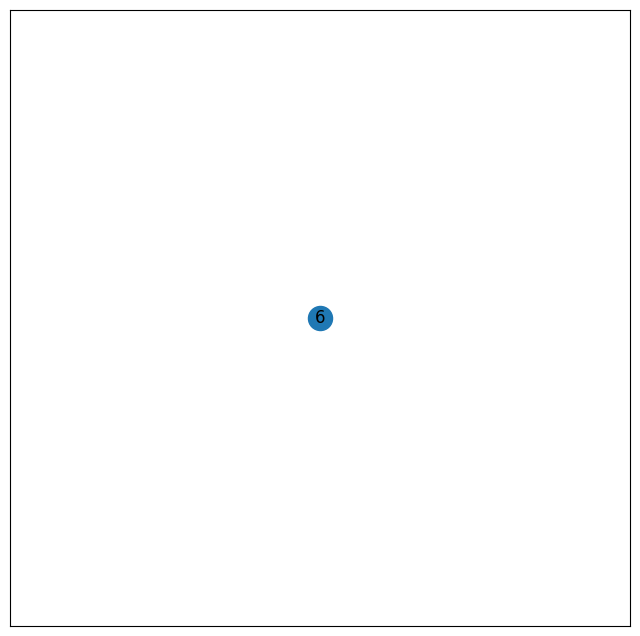

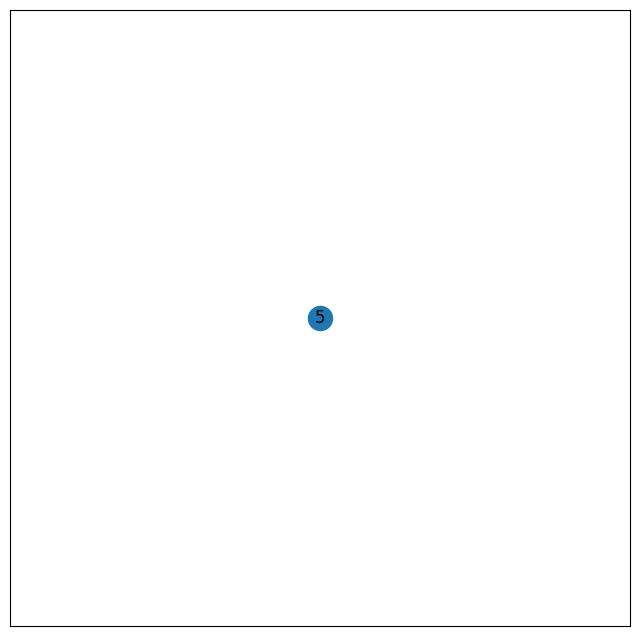

In [29]:
scc = g.strongly_connected_components()
for c in scc:
    c.visualize()

## 7. Pickle

In [30]:
import pickle

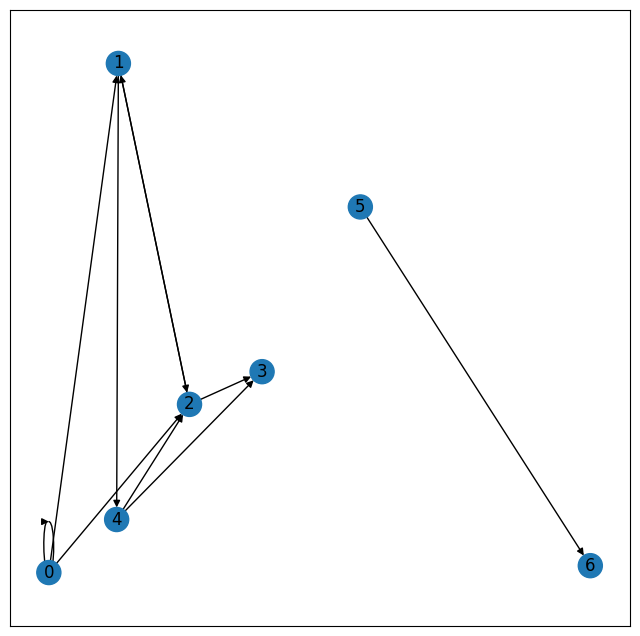

In [31]:
pickle.dump(g, open('graph.p', 'wb'))
g3 = pickle.load(open('graph.p', 'rb'))
g3.visualize()